In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
print(df.columns.values)

['id' 'gender' 'age' 'hypertension' 'heart_disease' 'ever_married'
 'work_type' 'Residence_type' 'avg_glucose_level' 'bmi' 'smoking_status'
 'stroke']


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Checking for Null Values

In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Filling null values in 'bmi' with mean value

In [8]:
df['bmi'].fillna(float(df['bmi'].mean()), inplace=True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [9]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Dropping column 'id'. Since it has no relation to our prediction

In [10]:
df = df.drop(['id'],axis='columns')

In [11]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


Plotting Stroke vs No of Patients

In [12]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

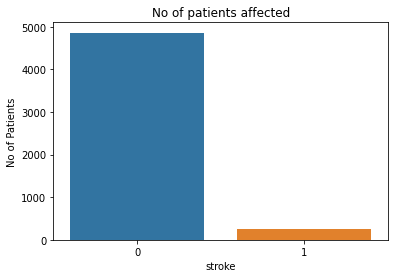

In [13]:
sns.countplot(x=df['stroke'])
plt.title("No of patients affected")
plt.ylabel("No of Patients")
plt.show()

Finding the relation/dependence of the categorical columns.

In [14]:
print("Gender :", df.gender.unique())
print("Hypertension :", df.hypertension.unique())
print("Heart Disease :", df.heart_disease.unique())
print("Ever Married :", df.ever_married.unique())
print("Work Type :", df.work_type.unique())
print("Residence Type :", df.Residence_type.unique())
print("Smoking Status :", df.smoking_status.unique())

Gender : ['Male' 'Female' 'Other']
Hypertension : [0 1]
Heart Disease : [1 0]
Ever Married : ['Yes' 'No']
Work Type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence Type : ['Urban' 'Rural']
Smoking Status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


**Stroke vs Gender**

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
Name: stroke, dtype: int64


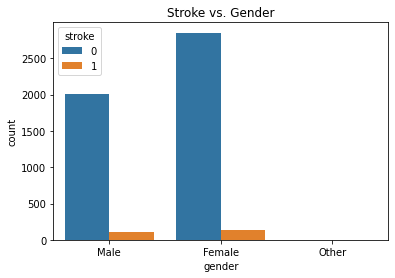

Male Probability : 4.94 %
Female Probability : 5.38 %


In [15]:
gender_group = df.groupby(['gender'])['stroke'].value_counts()
print(gender_group)

sns.countplot(x=df['gender'], hue=df['stroke'])
plt.title("Stroke vs. Gender")
plt.show()

print("Male Probability : {:.2f} %".format((gender_group['Female'][1] / gender_group['Female'][0])*100) )
print("Female Probability : {:.2f} %".format((gender_group['Male'][1] / gender_group['Male'][0])*100) )

***Inference :*** Both male and female have almost equal probability of stroke.


**Stroke vs Hypertension**

hypertension  stroke
0             0         4429
              1          183
1             0          432
              1           66
Name: stroke, dtype: int64


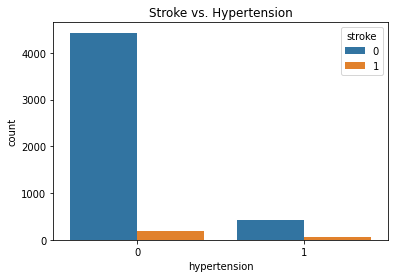

HT- Probability : 4.13 %
HT+ Probability : 15.28 %


In [16]:
ht_group = df.groupby(df.hypertension)['stroke'].value_counts()
print(ht_group)

sns.countplot(x=df['hypertension'], hue=df['stroke'])
plt.title("Stroke vs. Hypertension")
plt.show()

print("HT- Probability : {:.2f} %".format( (ht_group[0][1] / ht_group[0][0])*100 ) )
print("HT+ Probability : {:.2f} %".format( (ht_group[1][1] / ht_group[1][0])*100 ) )

***Inference :*** People diagnosed with hypertension have high chances of Stroke.


**Stroke vs Heart Disease**

heart_disease  stroke
0              0         4632
               1          202
1              0          229
               1           47
Name: stroke, dtype: int64


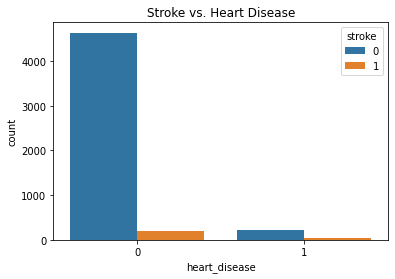

Heart Disease- Probability : 4.36 %
Heart Disease+ Probability : 20.52 %


In [17]:
hd_group = df.groupby(df.heart_disease)['stroke'].value_counts()
print(hd_group)

sns.countplot(x=df.heart_disease, hue=df['stroke'])
plt.title("Stroke vs. Heart Disease")
plt.show()

print("Heart Disease- Probability : {:.2f} %".format( (hd_group[0][1] / hd_group[0][0])*100 ) )
print("Heart Disease+ Probability : {:.2f} %".format( (hd_group[1][1] / hd_group[1][0])*100 ) )

***Inference :*** People who had heart disease have higher chances of stroke.

**Stroke vs Ever Married**

ever_married  stroke
No            0         1728
              1           29
Yes           0         3133
              1          220
Name: stroke, dtype: int64


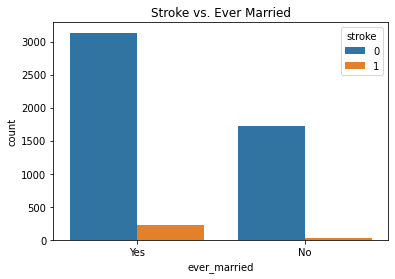

Not Married Probability : 1.68 %
Married Probability : 7.02 %


In [18]:
em_group = df.groupby(df.ever_married)['stroke'].value_counts()
print(em_group)

sns.countplot(x=df.ever_married, hue=df['stroke'])
plt.title("Stroke vs. Ever Married")
plt.show()

print("Not Married Probability : {:.2f} %".format( (em_group['No'][1] / em_group['No'][0])*100 ) )
print("Married Probability : {:.2f} %".format( (em_group['Yes'][1] / em_group['Yes'][0])*100 ) )

***Inference :*** People who are married have higher chances of Stroke.

**Stroke vs Work Type**

work_type      stroke
Govt_job       0          624
               1           33
Never_worked   0           22
Private        0         2776
               1          149
Self-employed  0          754
               1           65
children       0          685
               1            2
Name: stroke, dtype: int64


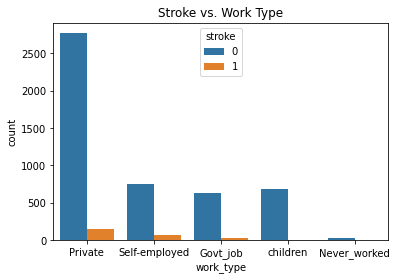

Govt Job Probability : 5.29 %
Private Job Probability : 5.37 %
Self Employed Probability : 8.62 %
Children Probability : 0.29 %


In [19]:
wt_group = df.groupby(df.work_type)['stroke'].value_counts()
print(wt_group)

sns.countplot(x=df.work_type, hue=df['stroke'])
plt.title("Stroke vs. Work Type")
plt.show()

print("Govt Job Probability : {:.2f} %".format( (wt_group['Govt_job'][1] / wt_group['Govt_job'][0])*100 ) )
print("Private Job Probability : {:.2f} %".format( (wt_group['Private'][1] / wt_group['Private'][0])*100 ) )
print("Self Employed Probability : {:.2f} %".format( (wt_group['Self-employed'][1] / wt_group['Self-employed'][0])*100 ) )
print("Children Probability : {:.2f} %".format( (wt_group['children'][1] / wt_group['children'][0])*100 ) )

***Inference :*** 
<br> So the people who are *Self-Employed* have *highest* rate of stroke whereas <br>
*Children* have the *least* rate of stroke. <br>
Also those who have *Never worked* havent had stroke at all.

**Stroke vs Residence Type**

Residence_type  stroke
Rural           0         2400
                1          114
Urban           0         2461
                1          135
Name: stroke, dtype: int64


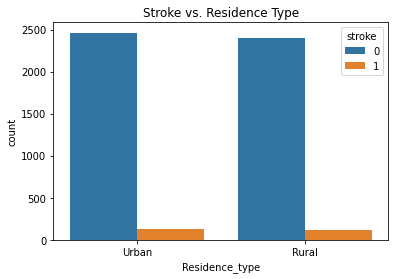

Rural Probability : 4.75 %
Urban Probability : 5.49 %


In [20]:
rt_group = df.groupby(df.Residence_type)['stroke'].value_counts()
print(rt_group)

sns.countplot(x=df.Residence_type, hue=df['stroke'])
plt.title("Stroke vs. Residence Type")
plt.show()

print("Rural Probability : {:.2f} %".format( (rt_group['Rural'][1] / rt_group['Rural'][0])*100 ) )
print("Urban Probability : {:.2f} %".format( (rt_group['Urban'][1] / rt_group['Urban'][0])*100 ) )

***Inference :*** So the Residence Type has almost no difference in Stroke Rate.

**Stroke vs Smoking Status**

smoking_status   stroke
Unknown          0         1497
                 1           47
formerly smoked  0          815
                 1           70
never smoked     0         1802
                 1           90
smokes           0          747
                 1           42
Name: stroke, dtype: int64


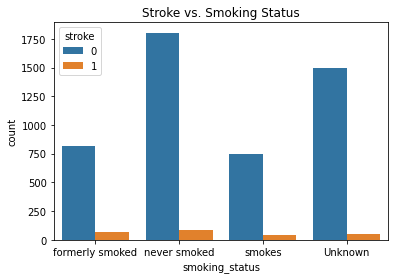

Unknown Probability : 3.14 %
Formerly Smoked Probability : 8.59 %
Never Smoked  Probability : 4.99 %
Smokes Probability : 5.62 %


In [21]:
smoke_group = df.groupby(df.smoking_status)['stroke'].value_counts()
print(smoke_group)

sns.countplot(x=df.smoking_status, hue=df['stroke'])
plt.title("Stroke vs. Smoking Status")
plt.show()

print("Unknown Probability : {:.2f} %".format( (smoke_group['Unknown'][1] / smoke_group['Unknown'][0])*100 ) )
print("Formerly Smoked Probability : {:.2f} %".format( (smoke_group['formerly smoked'][1] / smoke_group['formerly smoked'][0])*100 ) )
print("Never Smoked  Probability : {:.2f} %".format( (smoke_group['never smoked'][1] / smoke_group['never smoked'][0])*100 ) )
print("Smokes Probability : {:.2f} %".format( (smoke_group['smokes'][1] / smoke_group['smokes'][0])*100 ) )

***Inference :*** So the people who had *Formerly Smoked* have highest rate of stroke, and next people who *Smokes*.